## Read and Process `Ref`

In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('crawler_data/processed_with_references.csv')

# 显示总行数
print(f"数据集总行数: {len(df)}")

# 显示数据基本信息
print("\n数据集基本信息:")
print(df.info())

数据集总行数: 290131

数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290131 entries, 0 to 290130
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   DOI             290131 non-null  object
 1   References_DOI  290131 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


In [3]:
# 统计References_DOI列中每个值的出现频率
doi_counts = df["References_DOI"].value_counts()
print("\nReferences_DOI出现频率统计:")
print(doi_counts)


References_DOI出现频率统计:
References_DOI
No References                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
# 去掉重复值
df = df.drop_duplicates()
print(f"去重后的数据集行数: {len(df)}")

# 去掉References_DOI为'No References'或'ERROR'的行
df = df[~df['References_DOI'].isin(['No References', 'ERROR'])]
print(f"去掉No References和ERROR后的数据集行数: {len(df)}")

# 显示处理后的数据基本信息
print("\n处理后的数据基本信息:")
print(df.describe())
doi_counts = df["DOI"].value_counts()
print(doi_counts)


去重后的数据集行数: 289887
去掉No References和ERROR后的数据集行数: 283198

处理后的数据基本信息:
                         DOI  \
count                 283198   
unique                283198   
top     10.1155/2018/4657079   
freq                       1   

                                           References_DOI  
count                                              283198  
unique                                             283191  
top     10.2172/1767028||10.1088/1748-0221/12/06/P0601...  
freq                                                    2  
DOI
10.1155/2018/4657079                 1
10.1088/1742-6596/2156/1/012018      1
10.1093/mnras/stab3716               1
10.1103/PhysRevLett.128.134502       1
10.1088/2516-1083/ac692c             1
                                    ..
10.1103/PhysRevMaterials.4.014601    1
10.1103/PhysRevB.100.235114          1
10.1103/PhysRevB.102.144508          1
10.1016/j.nima.2020.163907           1
10.1007/s10955-019-02376-3           1
Name: count, Length: 283198, dtype: in

## Read and Process `paper_info`

In [5]:
# 读取processed_with_doi.csv文件
df_doi = pd.read_csv('crawler_data/processed_with_doi.csv')
print(f"processed_with_doi.csv数据集行数: {len(df_doi)}")

df_doi["DOI"].value_counts()


processed_with_doi.csv数据集行数: 290131


DOI
10.18716/kups/64624               6
10.58027/3q8k-ew90                5
10.1093/ptep/pty066               3
10.1126/science.aav3392           3
10.1088/2053-1583                 3
                                 ..
10.1016/j.asr.2019.11.007         1
10.1088/1674-1056/ab6553          1
10.1103/PhysRevA.101.043845       1
10.1016/j.physletb.2020.135305    1
10.1007/s10955-019-02376-3        1
Name: count, Length: 289887, dtype: int64

In [6]:
# 找出只出现一次的 DOI
doi_counts = df_doi['DOI'].value_counts()
unique_dois = doi_counts[doi_counts == 1].index

# 只保留这些 DOI 对应的行
df_doi = df_doi[df_doi['DOI'].isin(unique_dois)]
print(f"删除重复项后的数据集行数: {len(df_doi)}")

# 验证是否还有重复的 DOI
print("\n检查是否还有重复 DOI:")
print(df_doi['DOI'].value_counts().head())

删除重复项后的数据集行数: 289660

检查是否还有重复 DOI:
DOI
10.1155/2018/4657079                1
10.3847/1538-4365/ac1fe5            1
10.1088/1674-1137/ac0c74            1
10.3847/1538-4357/ac3250            1
10.1103/PhysRevApplied.16.044032    1
Name: count, dtype: int64


## Merge and Construct csv files

In [7]:
# 基于DOI进行内连接
merged_df = pd.merge(df_doi, df, on='DOI', how='inner')
print(f"内连接后的数据集行数: {len(merged_df)}")

# 显示连接后数据的基本信息
print("\n连接后数据的基本信息:")
print(merged_df.info())

merged_df.nunique()


内连接后的数据集行数: 283012

连接后数据的基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283012 entries, 0 to 283011
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   arXiv Code        283012 non-null  object
 1   Categories        283012 non-null  object
 2   Title             283012 non-null  object
 3   Abstract          283012 non-null  object
 4   Submission Date   283012 non-null  int64 
 5   Primary_Subclass  283012 non-null  object
 6   DOI               283012 non-null  object
 7   References_DOI    283012 non-null  object
dtypes: int64(1), object(7)
memory usage: 17.3+ MB
None


arXiv Code          283012
Categories          283012
Title               282979
Abstract            283006
Submission Date       2191
Primary_Subclass        53
DOI                 283012
References_DOI      283005
dtype: int64

In [8]:
merged_df['Title'].value_counts()

Title
Fast Radio Bursts                                                                                                       4
Coherence of quantum channels                                                                                           2
Cosmological radiation density with non-standard neutrino-electron interactions                                         2
Dynamics in fractal spaces                                                                                              2
Quasars as high-redshift standard candles                                                                               2
                                                                                                                       ..
A robust, template-free approach to precise radial velocity extraction                                                  1
I-Love-Q Relations for Realistic White Dwarfs                                                                           1
Unibody microscope

In [9]:
merged_df['References_DOI'].head()

0    10.1103/PhysRev.59.223||10.1119/1.1969508||10....
1    10.1002/lpor.201200032||10.1109/JPHOT.2013.224...
2    10.1016/j.physrep.2014.03.003||10.1002/adma.20...
3    10.1103/PhysRev.69.37||10.1364/OE.21.015603||1...
4    10.1016/j.snb.2004.09.024||10.1002/pssa.221153...
Name: References_DOI, dtype: object

In [10]:
# 将Submission Date转换为日期格式
merged_df['Submission Date'] = pd.to_datetime(merged_df['Submission Date'], format='%Y%m%d')

# 添加年份列
merged_df['Year'] = merged_df['Submission Date'].dt.year

# 统计每年的论文数量
yearly_counts = merged_df['Year'].value_counts().sort_index()

# 打印统计结果
print("每年发表的论文数量：")
print(yearly_counts)

每年发表的论文数量：
Year
2018    47259
2019    48308
2020    51907
2021    51401
2022    47665
2023    36472
Name: count, dtype: int64


In [17]:
# 检查DOI是否有重复
print("DOI重复项检查:")
print(f"总行数: {len(merged_df)}")
print(f"唯一DOI数: {merged_df['DOI'].nunique()}")
print("\nDOI重复次数统计:")
print(merged_df['DOI'].value_counts()[merged_df['DOI'].value_counts() > 1])

DOI重复项检查:
总行数: 283012
唯一DOI数: 283012

DOI重复次数统计:
Series([], Name: count, dtype: int64)


In [11]:
import numpy as np
import pandas as pd

# 创建统一的DOI到索引的映射
doi_to_idx = {doi: idx for idx, doi in enumerate(merged_df['DOI'].unique())}
idx_to_doi = {idx: doi for doi, idx in doi_to_idx.items()}

# 创建Primary_Subclass到标签的映射
unique_labels = merged_df['Primary_Subclass'].unique()
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}

# 创建训练/验证/测试集的索引数组
train_idx = []
valid_idx = []
test_idx = []

# 一次性处理所有数据
for doi, year in zip(merged_df['DOI'], merged_df['Year']):
    idx = doi_to_idx[doi]
    if 2018 <= year <= 2021:
        train_idx.append(idx)
    elif year == 2022:
        valid_idx.append(idx)
    elif year == 2023:
        test_idx.append(idx)

# 转换为numpy数组并保存
np.save('raw/train_idx.npy', np.array(list(set(train_idx))))
np.save('raw/valid_idx.npy', np.array(list(set(valid_idx))))
np.save('raw/test_idx.npy', np.array(list(set(test_idx))))

# 创建完整的edges.csv
edges_list = []
for doi, refs in zip(merged_df['DOI'], merged_df['References_DOI']):
    source_idx = doi_to_idx[doi]
    ref_dois = str(refs).split('||')
    for ref_doi in ref_dois:
        ref_doi = ref_doi.strip()
        if ref_doi in doi_to_idx:
            target_idx = doi_to_idx[ref_doi]
            # 去掉自环
            if source_idx != target_idx:
                edges_list.append([source_idx, target_idx])

# 去掉重复边
edges_df = pd.DataFrame(edges_list, columns=['source', 'target'])
edges_df = edges_df.drop_duplicates()

# 保存处理后的边
edges_df.to_csv('raw/edges.csv', index=False)

# 打印统计信息
print(f"总边数: {len(edges_list)}")
print(f"去掉重复边后的边数: {len(edges_df)}")
print(f"删除的重复边数: {len(edges_list) - len(edges_df)}")

# 创建并保存节点标签
node_labels = pd.DataFrame({
    'label': [label_to_idx[label] for label in merged_df['Primary_Subclass']]
})
node_labels.to_csv('raw/node_labels.csv', index=False)

# 打印统计信息
print(f"总节点数: {len(doi_to_idx)}")
print(f"总边数: {len(edges_df)}")
print(f"标签类别数: {len(label_to_idx)}")
print(f"\n训练集节点数: {len(set(train_idx))} ({len(set(train_idx))/len(doi_to_idx)*100:.1f}%)")
print(f"验证集节点数: {len(set(valid_idx))} ({len(set(valid_idx))/len(doi_to_idx)*100:.1f}%)")
print(f"测试集节点数: {len(set(test_idx))} ({len(set(test_idx))/len(doi_to_idx)*100:.1f}%)")

# 保存映射关系
mapping_df = pd.DataFrame({
    'idx': doi_to_idx.values(),
    'doi': doi_to_idx.keys()
})
mapping_df.to_csv('raw/node_mapping.csv', index=False)

# 保存标签映射
with open('raw/label_mapping.txt', 'w') as f:
    for label, idx in label_to_idx.items():
        f.write(f"{label}: {idx}\n")

总边数: 2549389
去掉重复边后的边数: 2543027
删除的重复边数: 6362
总节点数: 283012
总边数: 2543027
标签类别数: 53

训练集节点数: 198875 (70.3%)
验证集节点数: 47665 (16.8%)
测试集节点数: 36472 (12.9%)


In [14]:
# 统计重复边
total_edges = len(edges_df)
unique_edges = len(edges_df.drop_duplicates())
duplicate_edges = total_edges - unique_edges

print(f"重复边数量: {duplicate_edges}")

# 统计自环
self_loops = len(edges_df[edges_df['source'] == edges_df['target']])

print(f"\n自环数量: {self_loops}")

重复边数量: 0

自环数量: 0


## Utility

In [54]:
def get_node_info(node_idx):
    """
    输入节点索引，返回该节点的详细信息
    
    Args:
        node_idx (int): 节点索引号
    """
    try:
        # 获取DOI
        doi = idx_to_doi[node_idx]
        # 获取节点信息
        node_info = merged_df[merged_df['DOI'] == doi].iloc[0]
        
        print(f"Node {node_idx}:")
        print("-" * 50)
        print(f"DOI: {doi}")
        print(f"arXiv: {node_info['arXiv Code']}")
        print(f"Primary_Subclass: {node_info['Primary_Subclass']}")
        print(f"Title: {node_info['Title']}")
        
    except KeyError:
        print(f"索引 {node_idx} 不存在")
    except Exception as e:
        print(f"查询出错: {str(e)}")

# 使用示例
# get_node_info(254726)  # 查询索引为1的节点
# get_node_info(49267)  # 查询索引为15017的节点
get_node_info(972)  # 查询索引为15017的节点

Node 972:
--------------------------------------------------
DOI: 10.1007/JHEP03(2018)028
arXiv: arXiv:1712.07398
Primary_Subclass: hep-th
Title: Towards the Holographic Dual of N = 2 SYK


Average citations per paper: 10.80
Median citation count: 7.00
Maximum citations: 875
Minimum citations: 1

Citation count distribution:
count
1    31817
2    23904
3    19440
4    16211
5    13823
Name: count, dtype: int64


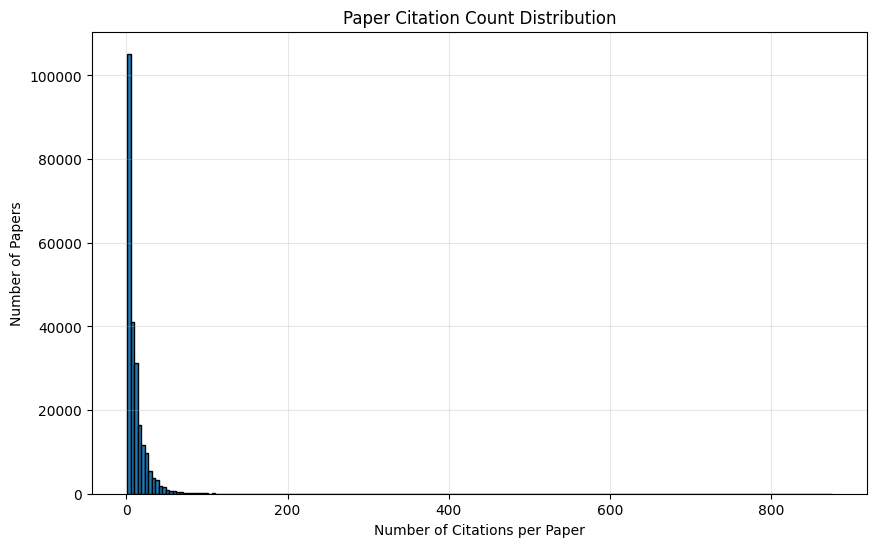

In [13]:
import  matplotlib.pyplot as plt
# 统计引用次数分布
cite_counts = edges_df['source'].value_counts()

# Plot citation count distribution
plt.figure(figsize=(10, 6))
plt.hist(cite_counts, bins=200, edgecolor='black')
plt.title('Paper Citation Count Distribution')
plt.xlabel('Number of Citations per Paper')
plt.ylabel('Number of Papers')
plt.grid(True, alpha=0.3)

# Add some statistics
print(f"Average citations per paper: {cite_counts.mean():.2f}")
print(f"Median citation count: {cite_counts.median():.2f}")
print(f"Maximum citations: {cite_counts.max()}")
print(f"Minimum citations: {cite_counts.min()}")
print("\nCitation count distribution:")
print(cite_counts.value_counts().sort_index().head())


## Text Embeddings

In [48]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

# 加载SciBERT模型和分词器
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')
model.eval()

def get_scibert_embedding(text, max_length=512):
    """获取文本的SciBERT嵌入"""
    inputs = tokenizer(text, 
                      return_tensors="pt",
                      max_length=max_length,
                      truncation=True,
                      padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state
        mask = inputs['attention_mask'].unsqueeze(-1)
        masked_embeddings = embeddings * mask
        summed = torch.sum(masked_embeddings, dim=1)
        avg_embeddings = summed / torch.sum(mask, dim=1)
        
    return avg_embeddings.numpy()[0]

# 首先按DOI排序数据
sorted_df = merged_df.set_index('DOI').loc[idx_to_doi.values()].reset_index()

# 获取前三个节点的数据
test_samples = sorted_df.head(3)

print("测试前三个节点的文本嵌入：")
print("-" * 80)

for idx, row in test_samples.iterrows():
    print(f"Node {idx}:")
    print(f"DOI: {row['DOI']}")
    print(f"Title: {row['Title']}")
    print(f"Abstract: {row['Abstract'][:200]}...")  # 只显示摘要的前200个字符
    
    # 拼接文本并获取嵌入
    text = f"{row['Title']} [SEP] {row['Abstract']}"
    embedding = get_scibert_embedding(text)
    
    print(f"\n嵌入向量维度: {embedding.shape}")
    print(f"嵌入向量前10个值: {embedding[:10]}")
    print(f"嵌入向量L2范数: {np.linalg.norm(embedding):.4f}")
    print("-" * 80)

/opt/miniconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

/opt/miniconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

测试前三个节点的文本嵌入：
--------------------------------------------------------------------------------
Node 0:
DOI: 10.1155/2018/4657079
Title: Moving unstable particles and special relativity
Abstract: In Poincare-Wigner-Dirac theory of relativistic interactions, boosts are dynamical. This means that - just like time translations - boost transformations have non-trivial effect on internal variables ...

嵌入向量维度: (768,)
嵌入向量前10个值: [-0.11566325 -0.24276526  0.06427857 -0.02517963  0.359349   -0.11243422
  0.558457    0.15690462 -0.22599123  0.17006728]
嵌入向量L2范数: 14.1689
--------------------------------------------------------------------------------
Node 1:
DOI: 10.1364/OL.43.000935
Title: Optical vector network analysis of ultra-narrow transitions in $^{166}$Er$^{3+}$:$^7$LiYF$_4$
Abstract: We present optical vector network analysis (OVNA) of an isotopically purified $^{166}$Er$^{3+}$:$^7$LiYF$_4$ crystal. The OVNA method is based on generation and detection of modulated optical sideband...

嵌入

In [26]:
# 保存排序后的DataFrame
sorted_df = merged_df.set_index('DOI').loc[idx_to_doi.values()].reset_index()
sorted_df.to_csv('raw/sorted_papers.csv', index=False)